# import library

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# merge data

In [2]:
data_path = '../../Dataset/BLE Data'

file_name = '4 day'

rssi_list = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16', '17','18','19','20', '21','22', '23','24','25']

mac_list = ['F7:7F:78:76:7E:F3',
            'C6:CD:5E:3D:2F:BB',
            'D6:F4:3A:79:74:63',
            'C9:17:55:E2:3E:0E',
            'CA:60:AB:EE:EC:7F',
            'D6:51:7F:AB:0E:29',
            'CC:54:33:F6:A7:90',
            'EB:20:56:87:04:5A',
            'EE:E7:46:DC:19:6F',
            'C8:5B:BF:37:07:A0',
            'D7:26:F6:A3:44:D2',
            'DD:83:B0:27:FD:36',
            'E5:CD:4A:36:87:06',
            'DC:22:B8:17:4E:B5',
            'EA:09:20:80:D6:44',
            'E6:99:D1:EC:C6:81',
            'F6:DA:97:C7:D5:28',
            'EA:66:A1:12:2C:F4',
            'C9:EA:57:8B:0F:80',
            'D6:7C:1D:2C:2A:0A',
            'DA:E1:70:5F:44:97',
            'DD:10:10:F6:4F:27',
            'E6:F3:93:A8:9E:22',
            'E6:60:05:1F:88:F9',
            'D4:33:FD:F4:C2:A8']

file_list = os.listdir(data_path)

csv_data = []
for csv_file in file_list:
  csv_data.append(pd.read_csv(os.path.join(data_path,csv_file),names=['user_id','timestamp','name', 'mac address', 'RSSI', 'power']))

df = csv_data[0]
for i in range(1,len(csv_data)):
  df = pd.concat([df,csv_data[i]])

print(df.shape)
df.head(5)

(5005751, 6)


,user_id,timestamp,name,mac address,RSSI,power
0,90,2023-04-10T10:22:55.589+0900,NaN,FD:07:0E:D5:28:AE,-75,-2147483648
1,90,2023-04-10T10:22:55.595+0900,NaN,FD:07:0E:D5:28:AE,-75,-2147483648
2,90,2023-04-10T10:22:55.601+0900,NaN,FD:07:0E:D5:28:AE,-75,-2147483648
3,90,2023-04-10T10:22:55.605+0900,NaN,FD:07:0E:D5:28:AE,-75,-2147483648
4,90,2023-04-10T10:22:55.609+0900,NaN,D2:1C:25:72:FB:E3,-62,-2147483648


In [4]:
df.to_csv('../../Dataset/df_concatenated.csv', index=False)

# load data

In [2]:
df = pd.read_csv('../../Dataset/df_concatenated.csv')
label = pd.read_csv('../../Dataset/5f_label_loc_train.csv')

# eda

In [6]:
print(df.info())

print(label.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5005751 entries, 0 to 5005750
Data columns (total 6 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_id      int64 
 1   timestamp    object
 2   name         object
 3   mac address  object
 4   RSSI         int64 
 5   power        int64 
dtypes: int64(3), object(3)
memory usage: 229.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  1334 non-null   int64 
 1   Unnamed: 0    1334 non-null   int64 
 2   activity      1334 non-null   object
 3   started_at    1334 non-null   object
 4   finished_at   1334 non-null   object
 5   deleted_at    55 non-null     object
 6   updated_at    1334 non-null   object
 7   user_id       1334 non-null   int64 
 8   user          1334 non-null   object
 9   room          1332 non-null   object
 10  floor         1

## rssi

In [7]:
df.head(1)

,user_id,timestamp,name,mac address,RSSI,power
0,90,2023-04-10T10:22:55.589+0900,NaN,FD:07:0E:D5:28:AE,-75,-2147483648


In [8]:
print(df['user_id'].value_counts())
print(df['name'].value_counts())

user_id
90    5005751
Name: count, dtype: int64
name
Tile                      3302
AirPods_okokp             1843
ATH-CKS30TW               1790
AirPods                   1197
LE_ATH-CKS30TW             805
C60-E5F3                   494
Charge 5                   467
JBL CLUB PRO+ TWS-LE       338
vívoactive3                224
MOMENTUM TW 2              160
SMP72                      125
F2                          80
WHILL Service               60
TR8530 seri                 47
LE_LinkBuds                 45
20018A04663245GAD           42
GenioSan_009D6B5ECE7D       40
LG-PL7(5C)                  30
JBL Charge 5                30
ATJAutoDoor                 28
COTSUBU                     25
LE_WF-H800 (h.ear)          25
Square Reader 5754          20
Q9-PRO(ID-AD1D)             15
Chromecast8638              15
LE-SRS-XB13                 15
BT5.2 Mouse                 15
LE_WF-1000XM3               14
ATH-CK1TW_R#1000_WH         14
SPACER2762                  10
Mi Smart Band 6  

In [9]:
print(df['mac address'].nunique())
print(df['power'].nunique())
print(df['RSSI'].nunique())

4832
18
86


(array([4327327.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,  678424.]),
 array([-2.14748365e+09, -1.93273528e+09, -1.71798691e+09, -1.50323854e+09,
        -1.28849018e+09, -1.07374181e+09, -8.58993441e+08, -6.44245073e+08,
        -4.29496706e+08, -2.14748338e+08,  3.00000000e+01]),
 <BarContainer object of 10 artists>)

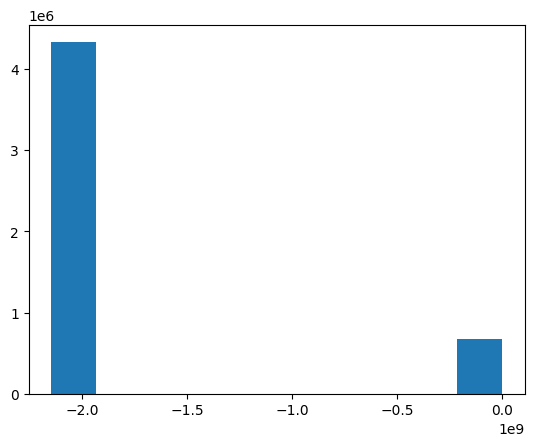

In [10]:
plt.hist(df['power'])

(array([  78335., 2096373.,  960440.,  762154.,  501673.,  427096.,
         104916.,   30658.,   32987.,   11119.]),
 array([-108. ,  -99.4,  -90.8,  -82.2,  -73.6,  -65. ,  -56.4,  -47.8,
         -39.2,  -30.6,  -22. ]),
 <BarContainer object of 10 artists>)

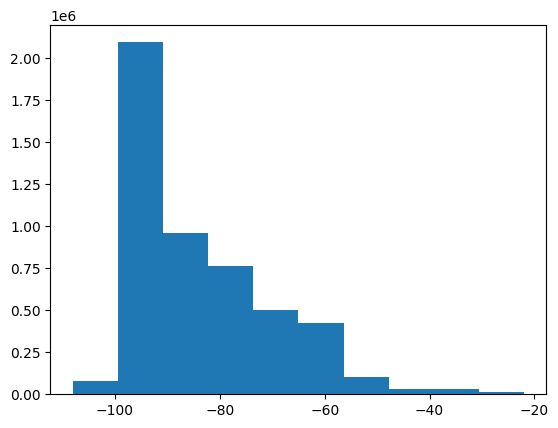

In [11]:
plt.hist(df['RSSI'])

## label

In [12]:
label.head(1)

,Unnamed: 0.1,Unnamed: 0,activity,started_at,finished_at,deleted_at,updated_at,user_id,user,room,floor
0,170,170,Location,2023-04-10 14:21:46+09:00,2023-04-10 14:21:50+09:00,NaN,2023-04-10 05:22:02 UTC,97,5th-location,kitchen,5th


In [13]:
print(label['activity'].value_counts())
print(label['user_id'].value_counts())
print(label['user'].value_counts())
print(label['room'].value_counts())
print(label['floor'].value_counts())

activity
Location            1325
就寝前食事                  2
朝食                     1
その他食事                  1
ANSIEL                 1
処置                     1
特記事項・連絡事項              1
おやつ                    1
ケア天気予報についてのアンケート       1
Name: count, dtype: int64
user_id
91    870
97    463
38      1
Name: count, dtype: int64
user
2nd-location            870
5th-location            463
sample  default user      1
Name: count, dtype: int64
room
hallway          239
Cafeteria D      204
cafeteria        129
Cafeteria A      109
Office Small     104
nurse station     98
Cafeteria B       91
kitchen           78
cleaning          28
Office Large      22
Clean Room        21
201               19
213               18
523               17
Cafeteria C       13
210                9
206                9
520                9
Bathroom           8
203                8
Nurse Room         8
513                6
522                6
202                6
207                6
517                5
508       

# preprocessing

## cleaning

In [14]:
df = df.drop(columns=['name'])

label = label.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'user', 'floor'])

In [15]:
# rename agar jelas
label = label.rename(columns={
    'started_at': 'start_time',
    'finished_at': 'stop_time'
})

# parse waktu
label['start_time'] = pd.to_datetime(label['start_time'], errors='coerce')
label['stop_time']  = pd.to_datetime(label['stop_time'], errors='coerce')

# hitung durasi
label['duration'] = (label['stop_time'] - label['start_time']).dt.total_seconds()

# filter valid
label = label[
    label['start_time'].notna() &
    label['stop_time'].notna() &
    (label['duration'] > 0) &
    label['deleted_at'].isna()
]

# hapus null penting & duplikat
label = label.dropna(subset=['room'])
label = label.drop_duplicates()

In [16]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df[df['timestamp'].notna()]

: 

: 

In [ ]:
df['timestamp'] = df['timestamp'].dt.tz_convert('Asia/Tokyo')
label['start_time'] = label['start_time'].dt.tz_convert('Asia/Tokyo')
label['stop_time'] = label['stop_time'].dt.tz_convert('Asia/Tokyo')

In [ ]:
label = label.loc[label['activity'] == 'Location']
label = label.drop(columns=['deleted_at', 'updated_at', 'activity'])

In [ ]:
df = df.sort_values('timestamp').reset_index(drop=True)
label = label.sort_values('start_time').reset_index(drop=True)

In [ ]:
# ambil rentang label
start_label = label['start_time'].min()
end_label = label['stop_time'].max()

# potong RSSI ke rentang label
df = df[(df['timestamp'] >= start_label) & (df['timestamp'] <= end_label)].copy()

print(df['timestamp'].min(), df['timestamp'].max())

2023-04-10 14:21:46.003000+09:00 2023-04-13 13:56:21.710000+09:00


In [ ]:
print(start_label)
print(end_label)

2023-04-10 14:21:46+09:00
2023-04-13 17:29:59+09:00


In [ ]:
rooms = []
lbl = label.to_dict('records')
j = 0
n = len(lbl)

for ts in df['timestamp']:
    # geser interval label sampai stop_time >= ts
    while j < n and ts > lbl[j]['stop_time']:
        j += 1

    if j < n and lbl[j]['start_time'] <= ts <= lbl[j]['stop_time']:
        rooms.append(lbl[j]['room'])
    else:
        rooms.append(np.nan)

df['room'] = rooms

# buang RSSI tanpa label
df1 = df.dropna(subset=['room']).reset_index(drop=True)


In [ ]:
print(df1.shape)
print(df1['room'].value_counts())

(2801370, 6)
room
nurse station    715904
Office Large     671342
Office Small     281160
kitchen          217449
cafeteria        202010
Cafeteria D      171031
hallway          116417
523               60060
208               56370
cleaning          41227
213               34870
513               25511
201               25175
210               23313
202               20227
Cafeteria A       18105
Cafeteria B       16606
520               13276
506               12235
501               10694
511               10022
Clean 9            7681
512                6550
522                6447
Clean Room         4645
515                4270
Cafeteria C        3972
206                3436
207                3297
Bathroom           3287
503                3104
508                3003
203                2393
212                2092
502                1649
516                1231
Nurse Room          723
510                 456
505                 100
518                  30
Name: count, dtype: in

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2801370 entries, 0 to 2801369
Data columns (total 6 columns):
 #   Column       Dtype                     
---  ------       -----                     
 0   user_id      int64                     
 1   timestamp    datetime64[ns, Asia/Tokyo]
 2   mac address  object                    
 3   RSSI         int64                     
 4   power        int64                     
 5   room         object                    
dtypes: datetime64[ns, Asia/Tokyo](1), int64(3), object(2)
memory usage: 128.2+ MB


In [ ]:
df1.to_csv('../../Dataset/df_cleaned.csv')

## feature engineering

In [2]:
df = pd.read_csv('../../Dataset/df_cleaned.csv')

In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df[df['timestamp'].notna()]
df = df.drop(columns=['Unnamed: 0'])

In [4]:
mac_list = ['F7:7F:78:76:7E:F3',
            'C6:CD:5E:3D:2F:BB',
            'D6:F4:3A:79:74:63',
            'C9:17:55:E2:3E:0E',
            'CA:60:AB:EE:EC:7F',
            'D6:51:7F:AB:0E:29',
            'CC:54:33:F6:A7:90',
            'EB:20:56:87:04:5A',
            'EE:E7:46:DC:19:6F',
            'C8:5B:BF:37:07:A0',
            'D7:26:F6:A3:44:D2',
            'DD:83:B0:27:FD:36',
            'E5:CD:4A:36:87:06',
            'DC:22:B8:17:4E:B5',
            'EA:09:20:80:D6:44',
            'E6:99:D1:EC:C6:81',
            'F6:DA:97:C7:D5:28',
            'EA:66:A1:12:2C:F4',
            'C9:EA:57:8B:0F:80',
            'D6:7C:1D:2C:2A:0A',
            'DA:E1:70:5F:44:97',
            'DD:10:10:F6:4F:27',
            'E6:F3:93:A8:9E:22',
            'E6:60:05:1F:88:F9',
            'D4:33:FD:F4:C2:A8']

df = df[df['mac address'].isin(mac_list)]
df = df.sort_values('timestamp').reset_index(drop=True)

In [5]:
WINDOW = '45s'
df['window_start'] = df['timestamp'].dt.floor(WINDOW)

room_per_window = (
    df.groupby('window_start')['room']
      .nunique()
      .value_counts()
)

room_per_window

room
1    729
2    175
3     35
4      4
5      1
Name: count, dtype: int64

In [6]:
valid_windows = (
    df.groupby('window_start')['room']
      .nunique()
      .reset_index()
)

valid_windows = valid_windows[valid_windows['room'] == 1]['window_start']

df = df[df['window_start'].isin(valid_windows)].reset_index(drop=True)

df.groupby('window_start')['room'].nunique().value_counts()

room
1    729
Name: count, dtype: int64

In [7]:
# RSSI matrix: window x beacon
rssi_matrix = (
    df
    .groupby(['window_start', 'mac address'])['RSSI']
    .mean()              
    .unstack('mac address')
    .sort_index()
)

In [8]:
rssi_matrix

mac address,C6:CD:5E:3D:2F:BB,C8:5B:BF:37:07:A0,C9:17:55:E2:3E:0E,C9:EA:57:8B:0F:80,CA:60:AB:EE:EC:7F,CC:54:33:F6:A7:90,D4:33:FD:F4:C2:A8,D6:51:7F:AB:0E:29,D6:7C:1D:2C:2A:0A,D6:F4:3A:79:74:63,...,E5:CD:4A:36:87:06,E6:60:05:1F:88:F9,E6:99:D1:EC:C6:81,E6:F3:93:A8:9E:22,EA:09:20:80:D6:44,EA:66:A1:12:2C:F4,EB:20:56:87:04:5A,EE:E7:46:DC:19:6F,F6:DA:97:C7:D5:28,F7:7F:78:76:7E:F3
window_start,,,,,,,,,,,,,,,,,,,,,
2023-04-10 14:22:30+09:00,NaN,NaN,-94.812375,NaN,NaN,NaN,NaN,-96.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-10 14:24:45+09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-99.000000,NaN,NaN,NaN,NaN,-98.00
2023-04-10 14:25:30+09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-96.545455,NaN,-100.0,NaN,-96.213018,NaN,NaN,NaN,NaN,-96.75
2023-04-10 14:28:30+09:00,NaN,NaN,NaN,-91.780822,-93.512195,NaN,NaN,-93.522184,NaN,NaN,...,NaN,NaN,-99.0,NaN,NaN,NaN,NaN,-97.571429,-98.166667,NaN
2023-04-10 14:30:00+09:00,NaN,-91.714286,NaN,NaN,NaN,NaN,NaN,NaN,-86.200000,NaN,...,NaN,NaN,NaN,NaN,NaN,-97.500000,-92.428571,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-13 12:44:15+09:00,NaN,NaN,-89.833333,-96.363636,-95.000000,-95.000000,NaN,-90.500000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-97.000000,-97.000000,-94.136364,NaN,NaN
2023-04-13 12:45:00+09:00,NaN,NaN,-97.000000,NaN,NaN,NaN,NaN,-97.960000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-13 12:47:15+09:00,NaN,NaN,NaN,-98.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-95.000000,NaN,NaN


In [9]:
agg_funcs = ['min', 'max', 'count']
#agg_funcs = ['mean', 'std', 'var', 'min', 'max', 'median', 'sum', 'count']

feat = (
    df
    .groupby(['window_start', 'room', 'mac address'])['RSSI']
    .agg(agg_funcs)
    .unstack('mac address')
)

# flatten kolom: {mac}_{stat}
feat.columns = [f'{mac}_{stat}' for stat, mac in feat.columns]
feat = feat.reset_index()

In [10]:
feat

,window_start,room,C6:CD:5E:3D:2F:BB_min,C8:5B:BF:37:07:A0_min,C9:17:55:E2:3E:0E_min,C9:EA:57:8B:0F:80_min,CA:60:AB:EE:EC:7F_min,CC:54:33:F6:A7:90_min,D4:33:FD:F4:C2:A8_min,D6:51:7F:AB:0E:29_min,...,E5:CD:4A:36:87:06_count,E6:60:05:1F:88:F9_count,E6:99:D1:EC:C6:81_count,E6:F3:93:A8:9E:22_count,EA:09:20:80:D6:44_count,EA:66:A1:12:2C:F4_count,EB:20:56:87:04:5A_count,EE:E7:46:DC:19:6F_count,F6:DA:97:C7:D5:28_count,F7:7F:78:76:7E:F3_count
0,2023-04-10 14:22:30+09:00,kitchen,NaN,NaN,-101.0,NaN,NaN,NaN,NaN,-97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-04-10 14:24:45+09:00,501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,17.0
2,2023-04-10 14:25:30+09:00,501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,187.0,NaN,34.0,NaN,169.0,NaN,NaN,NaN,NaN,68.0
3,2023-04-10 14:28:30+09:00,506,NaN,NaN,NaN,-99.0,-101.0,NaN,NaN,-101.0,...,NaN,NaN,34.0,NaN,NaN,NaN,NaN,119.0,102.0,NaN
4,2023-04-10 14:30:00+09:00,520,NaN,-96.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,34.0,119.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,2023-04-13 12:44:15+09:00,Clean Room,NaN,NaN,-93.0,-100.0,-95.0,-97.0,NaN,-91.0,...,NaN,NaN,NaN,NaN,NaN,24.0,6.0,132.0,NaN,NaN
725,2023-04-13 12:45:00+09:00,Clean Room,NaN,NaN,-99.0,NaN,NaN,NaN,NaN,-100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
726,2023-04-13 12:47:15+09:00,nurse station,NaN,NaN,NaN,-98.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN
727,2023-04-13 12:48:00+09:00,nurse station,NaN,NaN,-96.0,-98.0,-96.0,-98.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,NaN,NaN


In [11]:
feat['hour'] = feat['window_start'].dt.hour
feat['minute'] = feat['window_start'].dt.minute
feat['second'] = feat['window_start'].dt.second

In [12]:
feat = feat.fillna(-100)

# modelling

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.utils.class_weight import compute_class_weight

In [14]:
X = feat.drop(columns=['window_start', 'room'])
y = feat['room']

In [15]:
X.columns = (
    X.columns
    .str.replace(':', '_', regex=False)
    .str.replace('-', '_', regex=False)
    .str.replace(' ', '_', regex=False)
)

In [16]:
min_samples = 5
valid_rooms = y.value_counts()[y.value_counts() >= min_samples].index

mask = y.isin(valid_rooms)
X = X[mask]
y = y[mask]

In [17]:
print(X.shape, y.shape)
X.iloc[:2, :5]
y.value_counts()

(708, 78) (708,)


room
nurse station    146
kitchen          127
Office Small      82
cafeteria         67
Cafeteria D       61
Office Large      39
hallway           31
523               31
201               17
513               16
213               13
520               12
208               11
512               11
210               10
522                9
Cafeteria B        8
cleaning           7
511                5
515                5
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_enc = le.fit_transform(y)

In [19]:
sss_1 = StratifiedShuffleSplit(
    n_splits=1,
    test_size=0.30,
    random_state=42
)

for train_idx, temp_idx in sss_1.split(X, y_enc):
    X_train = X.iloc[train_idx]
    y_train = y_enc[train_idx]

    X_temp = X.iloc[temp_idx]
    y_temp = y_enc[temp_idx]

sss_2 = StratifiedShuffleSplit(
    n_splits=1,
    test_size=2/3,
    random_state=42
)

for val_idx, test_idx in sss_2.split(X_temp, y_temp):
    X_val = X_temp.iloc[val_idx]
    y_val = y_temp[val_idx]

    X_test = X_temp.iloc[test_idx]
    y_test = y_temp[test_idx]

### Oversampling

In [20]:
#smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)
#X_train, y_train = smote.fit_resample(X_train, y_train)

### Undersampling

In [21]:
#from imblearn.under_sampling import RandomUnderSampler

#rus = RandomUnderSampler(sampling_strategy='auto', random_state=42, replacement=False)
#X_train, y_train = rus.fit_resample(X_train, y_train)

In [22]:
models = {
    "DT": DecisionTreeClassifier(random_state=42),
    "RF": RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
    # "SVM": SVC(kernel='rbf', probability=True),
    # "KNN": KNeighborsClassifier(n_neighbors=5),
    # "LR": LogisticRegression(max_iter=1000, n_jobs=-1),
    "HGBC": HistGradientBoostingClassifier(random_state=42)
}

models.update({
    "LGBM": lgb.LGBMClassifier(
        objective='multiclass',
        num_class=len(set(y_enc)),
        n_estimators=300,
        learning_rate=0.05,
        random_state=42,
        verbosity=-1,          
        verbose=-1             
    ),
    "CatBoost": CatBoostClassifier(
        iterations=300,
        learning_rate=0.05,
        depth=6,
        verbose=0,
        random_state=42,
    ),
    
    "XGBoost": XGBClassifier(
        objective='multi:softprob',
        num_class=len(set(y_enc)),
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        eval_metric='mlogloss',
        random_state=42,
        verbosity=0
    )
})

In [23]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    results.append({
        'model': name,

        'val_accuracy': accuracy_score(y_val, y_val_pred),
        'val_precision': precision_score(y_val, y_val_pred, average='weighted', zero_division=0),
        'val_recall': recall_score(y_val, y_val_pred, average='weighted', zero_division=0),
        'val_f1': f1_score(y_val, y_val_pred, average='weighted', zero_division=0),
        'val_f1_macro': f1_score(y_val, y_val_pred, average='macro', zero_division=0),

        'test_accuracy': accuracy_score(y_test, y_test_pred),
        'test_precision': precision_score(y_test, y_test_pred, average='weighted', zero_division=0),
        'test_recall': recall_score(y_test, y_test_pred, average='weighted', zero_division=0),
        'test_f1': f1_score(y_test, y_test_pred, average='weighted', zero_division=0),
        'test_f1_macro': f1_score(y_test, y_test_pred, average='macro', zero_division=0),
    })

In [24]:
results_df = pd.DataFrame(results).sort_values(
    by='val_f1',
    ascending=False)

results_df

,model,val_accuracy,val_precision,val_recall,val_f1,val_f1_macro,test_accuracy,test_precision,test_recall,test_f1,test_f1_macro
3,LGBM,0.591549,0.550235,0.591549,0.559809,0.509916,0.690141,0.670893,0.690141,0.674566,0.506937
0,DT,0.563380,0.557688,0.563380,0.538319,0.507158,0.535211,0.547487,0.535211,0.530844,0.363248
2,HGBC,0.563380,0.514840,0.563380,0.528221,0.568661,0.690141,0.684977,0.690141,0.686128,0.511664
4,CatBoost,0.563380,0.471077,0.563380,0.504768,0.343603,0.640845,0.606506,0.640845,0.613510,0.411572
1,RF,0.563380,0.465539,0.563380,0.492131,0.388815,0.612676,0.577084,0.612676,0.584866,0.376881
5,XGBoost,0.521127,0.459593,0.521127,0.482861,0.458118,0.654930,0.642578,0.654930,0.644950,0.531212


### Hierarchical Classification

In [25]:
import torch
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler

import torch.nn as nn
import torch.optim as optim

In [26]:
# # define hierarchy
# hierarchy = {
#     'Patient Room': ['201', '202', '208', '210', '213', '501', '503', '508', '510', '511', '512', '513', '515', '520', '522', '523'],
#     'Non-Patient Room': ['nurse station', 'kitchen', 'Office Small', 'Office Large', 'cafeteria', 'Cafeteria B', 'Cafeteria D', 'hallway', 'Bathroom', 'cleaning', 'Clean Room']
# }

# # create reverse mapping: room -> level1
# room_to_level1 = {}
# for level1, rooms in hierarchy.items():
#     for room in rooms:
#         room_to_level1[room] = level1

# print("Hierarchy mapping:")
# for level1, rooms in hierarchy.items():
#     print(f"\n{level1}:")
#     print(f"  {rooms}")

# print("\nRoom to Level1 mapping:")
# print(room_to_level1)

In [27]:
y.value_counts()

room
nurse station    146
kitchen          127
Office Small      82
cafeteria         67
Cafeteria D       61
Office Large      39
hallway           31
523               31
201               17
513               16
213               13
520               12
208               11
512               11
210               10
522                9
Cafeteria B        8
cleaning           7
511                5
515                5
Name: count, dtype: int64

In [28]:
y.nunique()

20

In [29]:
X.shape

(708, 78)

In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [31]:
patient_rooms = ['201', '208', '210', '213', '511', '512', '513', '515', '520', '522', '523']

def get_room_category(room):
    return 'Patient Room' if str(room) in patient_rooms else 'Non-Patient Room'

In [32]:
y_level1_str = y.apply(get_room_category)
le_l1 = LabelEncoder()
y_l1_enc = le_l1.fit_transform(y_level1_str)

In [33]:
patient_mask_all = (y_level1_str == 'Patient Room')
le_l2 = LabelEncoder()
le_l2.fit(y[patient_mask_all])

LabelEncoder()

In [34]:
indices = np.arange(len(X))

sss_1 = StratifiedShuffleSplit(n_splits=1, test_size=0.30, random_state=42)
train_idx, temp_idx = next(sss_1.split(X, y_l1_enc))

X_temp_l1 = y_l1_enc[temp_idx]
sss_2 = StratifiedShuffleSplit(n_splits=1, test_size=2/3, random_state=42)
val_idx_rel, test_idx_rel = next(sss_2.split(np.zeros(len(temp_idx)), X_temp_l1))

In [35]:
val_idx = temp_idx[val_idx_rel]
test_idx = temp_idx[test_idx_rel]

X_train, y_l1_train, y_raw_train = X.iloc[train_idx], y_l1_enc[train_idx], y.iloc[train_idx]
X_val,   y_l1_val,   y_raw_val   = X.iloc[val_idx],   y_l1_enc[val_idx],   y.iloc[val_idx]
X_test,  y_l1_test,  y_raw_test  = X.iloc[test_idx],  y_l1_enc[test_idx],  y.iloc[test_idx]

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

In [37]:
def create_loader(X_data, y_data, batch_size=64, shuffle=False):
    tensor_x = torch.tensor(X_data, dtype=torch.float32)
    tensor_y = torch.tensor(y_data, dtype=torch.long)
    return DataLoader(TensorDataset(tensor_x, tensor_y), batch_size=batch_size, shuffle=shuffle)

train_loader_l1 = create_loader(X_train, y_l1_train, shuffle=True)
val_loader_l1   = create_loader(X_val,   y_l1_val)
test_loader_l1  = create_loader(X_test,  y_l1_test)

In [38]:
mask_train_p = (y_l1_train == le_l1.transform(['Patient Room'])[0])
mask_val_p   = (y_l1_val   == le_l1.transform(['Patient Room'])[0])

In [39]:
y_l2_train_enc = le_l2.transform(y_raw_train[mask_train_p])
y_l2_val_enc   = le_l2.transform(y_raw_val[mask_val_p])

train_loader_l2 = create_loader(X_train[mask_train_p], y_l2_train_enc, shuffle=True)
val_loader_l2   = create_loader(X_val[mask_val_p],   y_l2_val_enc)

In [40]:
class SimpleMLP(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_layers=[100, 50]):
        super(SimpleMLP, self).__init__()
        layers = []
        in_dim = input_dim
        
        for h_dim in hidden_layers:
            layers.append(nn.Linear(in_dim, h_dim))
            layers.append(nn.ReLU())
            layers.append(nn.BatchNorm1d(h_dim))
            layers.append(nn.Dropout(0.2))      
            in_dim = h_dim
            
        layers.append(nn.Linear(in_dim, output_dim))
        self.network = nn.Sequential(*layers)
        
    def forward(self, x):
        return self.network(x)

In [41]:
input_dim = X_train.shape[1]

model_l1 = SimpleMLP(input_dim, output_dim=2).to(device)
model_l2 = SimpleMLP(input_dim, output_dim=len(le_l2.classes_)).to(device)

In [42]:
mask_train_p = (y_l1_train == le_l1.transform(['Patient Room'])[0])
y_train_rooms = y_l2_train_enc

# Compute weights
class_weights = compute_class_weight(
    class_weight='balanced', 
    classes=np.unique(y_train_rooms), 
    y=y_train_rooms
)

weights_tensor = torch.tensor(class_weights, dtype=torch.float32).to(device)
print(f"Class Weights Calculated: {weights_tensor}")

Class Weights Calculated: tensor([0.6364, 1.1136, 1.7818, 1.1136, 2.2273, 1.1136, 0.6853, 2.2273, 0.8909,
        1.4848, 0.4949])


In [43]:
def train_model(model, train_loader, val_loader, epochs=100, lr=0.001, name="Model"):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    print(f"\nTraining {name}...")
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for X_b, y_b in train_loader:
            X_b, y_b = X_b.to(device), y_b.to(device)
            optimizer.zero_grad()
            outputs = model(X_b)
            loss = criterion(outputs, y_b)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            
        # Validation check
        if (epoch+1) % 20 == 0:
            model.eval()
            val_loss = 0
            correct = 0
            total = 0
            with torch.no_grad():
                for X_v, y_v in val_loader:
                    X_v, y_v = X_v.to(device), y_v.to(device)
                    out = model(X_v)
                    val_loss += criterion(out, y_v).item()
                    _, predicted = torch.max(out.data, 1)
                    total += y_v.size(0)
                    correct += (predicted == y_v).sum().item()
            print(f"Epoch {epoch+1}/{epochs} | Loss: {total_loss:.4f} | Val Acc: {100*correct/total:.2f}%")

train_model(model_l1, train_loader_l1, val_loader_l1, epochs=150, name="Level 1 (Binary)")
train_model(model_l2, train_loader_l2, val_loader_l2, epochs=150, name="Level 2 (Room)")


Training Level 1 (Binary)...
Epoch 20/150 | Loss: 1.0921 | Val Acc: 91.55%
Epoch 40/150 | Loss: 0.2686 | Val Acc: 87.32%
Epoch 60/150 | Loss: 0.2162 | Val Acc: 88.73%
Epoch 80/150 | Loss: 0.0768 | Val Acc: 87.32%
Epoch 100/150 | Loss: 0.0532 | Val Acc: 90.14%
Epoch 120/150 | Loss: 0.0415 | Val Acc: 87.32%
Epoch 140/150 | Loss: 0.1888 | Val Acc: 91.55%

Training Level 2 (Room)...
Epoch 20/150 | Loss: 1.6794 | Val Acc: 71.43%
Epoch 40/150 | Loss: 0.7928 | Val Acc: 71.43%
Epoch 60/150 | Loss: 0.4401 | Val Acc: 78.57%
Epoch 80/150 | Loss: 0.2366 | Val Acc: 85.71%
Epoch 100/150 | Loss: 0.1558 | Val Acc: 85.71%
Epoch 120/150 | Loss: 0.1395 | Val Acc: 85.71%
Epoch 140/150 | Loss: 0.0755 | Val Acc: 85.71%


In [44]:
def predict_hierarchical_torch(X_data_scaled):
    model_l1.eval()
    model_l2.eval()
    
    tensor_x = torch.tensor(X_data_scaled, dtype=torch.float32).to(device)
    
    # 1. Predict Level 1 (Batch)
    with torch.no_grad():
        out_l1 = model_l1(tensor_x)
        probs_l1 = torch.softmax(out_l1, dim=1)
        preds_l1 = torch.argmax(probs_l1, dim=1).cpu().numpy()
        
        # 2. Predict Level 2 
        out_l2 = model_l2(tensor_x)
        probs_l2 = torch.softmax(out_l2, dim=1)
        preds_l2 = torch.argmax(probs_l2, dim=1).cpu().numpy()

    final_rooms = []
    
    # 3. Combine Logic
    for i, l1_pred in enumerate(preds_l1):
        label_name = le_l1.inverse_transform([l1_pred])[0]
        
        if label_name == 'Patient Room':
            # Use Model 2 prediction
            room_name = le_l2.inverse_transform([preds_l2[i]])[0]
            final_rooms.append(room_name)
        else:
            final_rooms.append('Non-Patient Room')
            
    return preds_l1, final_rooms

In [45]:
print("\n" + "="*60)
print("EVALUATION ON TEST SET")
print("="*60)

pred_l1_test, pred_rooms_test = predict_hierarchical_torch(X_test)

y_test_adjusted = y_raw_test.copy().astype(str)
non_pat_mask = (y_l1_test == le_l1.transform(['Non-Patient Room'])[0])
y_test_adjusted.loc[non_pat_mask] = 'Non-Patient Room'

acc = accuracy_score(y_test_adjusted, pred_rooms_test)
f1 = f1_score(y_test_adjusted, pred_rooms_test, average='macro')
prec = precision_score(y_test_adjusted, pred_rooms_test, average='macro', zero_division=0)
rec = recall_score(y_test_adjusted, pred_rooms_test, average='macro', zero_division=0)

print(f"Final Accuracy:  {acc:.4f}")
print(f"Final F1 Macro:  {f1:.4f}")
print(f"Final Precision: {prec:.4f}")
print(f"Final Recall:    {rec:.4f}")


EVALUATION ON TEST SET
Final Accuracy:  0.8662
Final F1 Macro:  0.4751
Final Precision: 0.5621
Final Recall:    0.4834


In [46]:
results_df = pd.DataFrame({
    'True_Room': y_test_adjusted.values,
    'Pred_Room': pred_rooms_test
})
print("\nSample Predictions:")
print(results_df.sample(10))


Sample Predictions:
            True_Room         Pred_Room
137  Non-Patient Room  Non-Patient Room
17                210               523
7    Non-Patient Room  Non-Patient Room
66   Non-Patient Room  Non-Patient Room
83   Non-Patient Room               210
69   Non-Patient Room  Non-Patient Room
73   Non-Patient Room  Non-Patient Room
126               210               515
19   Non-Patient Room  Non-Patient Room
103  Non-Patient Room  Non-Patient Room
